11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
469/469 [==============================] - 5s 4ms/step - loss: 0.2546 - accuracy: 0.9267 - val_loss: 0.1202 - val_accuracy: 0.9635
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1030 - accuracy: 0.9695 - val_loss: 0.0889 - val_accuracy: 0.9735
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0676 - accuracy: 0

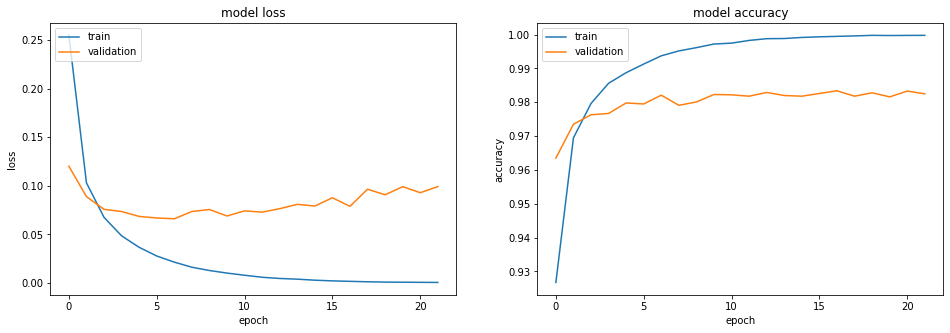

[2.64856e-19, 7.563982e-18, 1.0, 5.0774207e-19, 0.0, 1.919604e-22, 8.61329e-20, 0.0, 1.7685319e-20, 0.0]
Number is  2 (probability 100.0000)


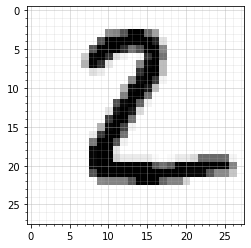

In [2]:
# 만들어진 모델에 대해 loss, accuracy 를 그래프로 표현
def display_graph():
    plt.figure(figsize=(16,5))

    # 만들어진 모델에 대해 train dataset과 validation dataset의 loss 를 그래프로 표현해 봅니다.
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    # 만들어진 모델에 대해 train dataset과 validation dataset의 accuracy 를 그래프로 표현해 봅니다.
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.show()

# 특정한 숫자(digit)의 이미지를 Display 해주는 함수 정의
def show_digit_image(image):
    # Draw digit image
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, 29, 5)
    minor_ticks = np.arange(0, 29, 1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    # And a corresponding grid
    ax.grid(which='both')
    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    ax.imshow(image, cmap=plt.cm.binary)

    plt.show()

import tensorflow
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

t_t = 100  # training 횟수(epoch)
num_classes = 10  # 분류하고자 하는 숫자가 총 10개(0 ~ 9)

# Keras Datasets 에서 제공하는 MNIST dataset을 불러옵니다.
from tensorflow.keras.datasets import mnist
# MNIST dataset을 불러와서 train dataset과 test dataset에 넣어 줍니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 모델 구성하기
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(num_classes, activation='softmax'))

# 모델 학습 설정하기
model.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

# 모델 구성 확인하기
model.summary()

x_train = x_train.reshape((60000, 28 * 28)) # Reshape 
x_train = x_train.astype('float32') / 255   # Feature Scaling(0 ~ 1 사이의 값으로 Data Preprocessing)


x_test_original = x_test  # test data(이미지) 복사
x_test = x_test.reshape((10000, 28 * 28))  # Reshape
x_test = x_test.astype('float32') / 255    # Feature Scaling(0 ~ 1 사이의 값으로 Data Preprocessing)

# One Hot 벡터로 변경해 주는 패키지를 불러옵니다.
from tensorflow.keras.utils import to_categorical

# label를 One Hot 벡터로 변경
y_train = to_categorical(y_train, num_classes)  
y_test = to_categorical(y_test, num_classes)

# EarlyStopping 기능과 ModelCheckpoint 기능을 사용하기 위해 모듈을 불러옵니다.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 모델이 가장 best일때 모델을 저장하도록 설정
modelCheckpoint = ModelCheckpoint('best_digits_model.h5', save_best_only=True)

# val_acc 를 모니터링 하다가 조기에 학습을 종료하도록 설정
monitor_val_acc = EarlyStopping(monitor='val_accuracy', 
                        patience=5)

# 모델 학습시키기
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    epochs=t_t, batch_size=128,
                    callbacks=[monitor_val_acc, modelCheckpoint])   # callbacks에 EarlyStopping, ModelCheckpoint 설정

# 그래프 출력
display_graph()

# 예측하기
selected_image = 1
result = model.predict(np.array([x_test[selected_image]]))  # result 에는 확률 벡터로 결과가 들어있음
result_number = np.argmax(result)   # argmax 함수를 사용해 확률 벡터 중 가장 큰 값의 index 를 반환

# 예측결과 출력
performance = [val for val in result[0]]
print(performance)
result_probability = performance[result_number]
print("Number is %2i (probability %7.4f)" % (result_number, result_probability*100))
show_digit_image(x_test_original[selected_image])

[3.9157542e-17, 2.2645807e-16, 9.139625e-15, 3.70261e-07, 1.9166492e-20, 0.99999964, 1.2718954e-16, 1.671729e-15, 5.440992e-12, 2.0273395e-14]
Number is  5 (probability 100.0000)


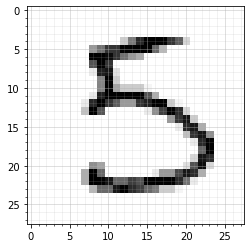

In [ ]:
# 예측하기
selected_image = 15
result = model.predict(np.array([x_test[selected_image]]))  # result 에는 확률 벡터로 결과가 들어있음
result_number = np.argmax(result)   # argmax 함수를 사용해 확률 벡터 중 가장 큰 값의 index 를 반환

# 예측결과 출력
performance = [val for val in result[0]]
print(performance)
result_probability = performance[result_number]
print("Number is %2i (probability %7.4f)" % (result_number, result_probability*100))
show_digit_image(x_test_original[selected_image])